
'''
   @Author: v sanjay kumar
   @Date: 2024-10-19 1:10:30
   @Last Modified by: v sanjay kumar
   @Last Modified time: 2024-10-19 1:10:30
   @Title : Programs of Deep Learning

'''


In [180]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

                                                  Load The Data

In [181]:
df=pd.read_csv('data',sep=';',index_col=0)
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.str.replace('""', '', regex=False)
df = df.map(lambda x: x.replace('"', '') if isinstance(x, str) else x)
df

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,"y"""
0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [182]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   balance    4521 non-null   int64 
 5   housing    4521 non-null   object
 6   loan       4521 non-null   object
 7   contact    4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y"         4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.3+ KB
None


                                                  Check The outliers

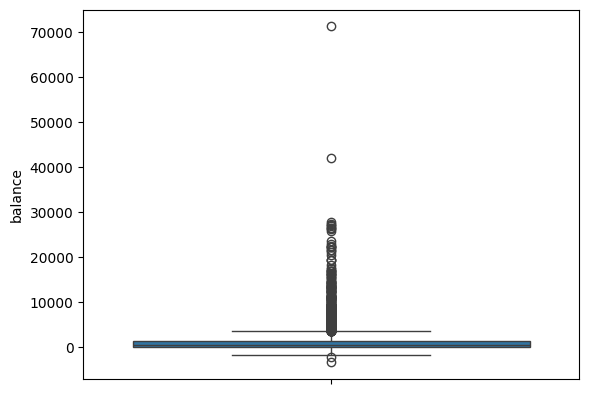

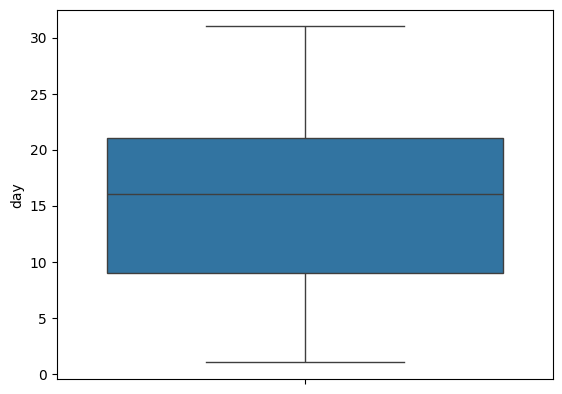

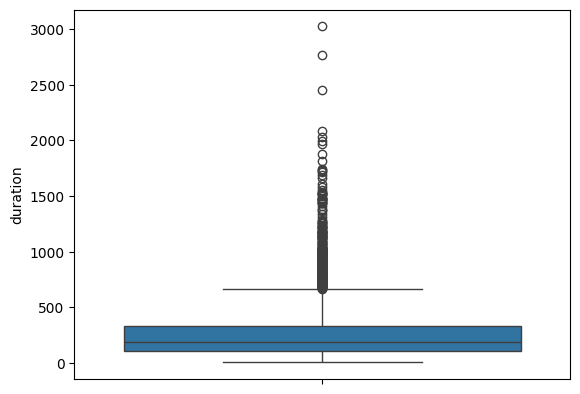

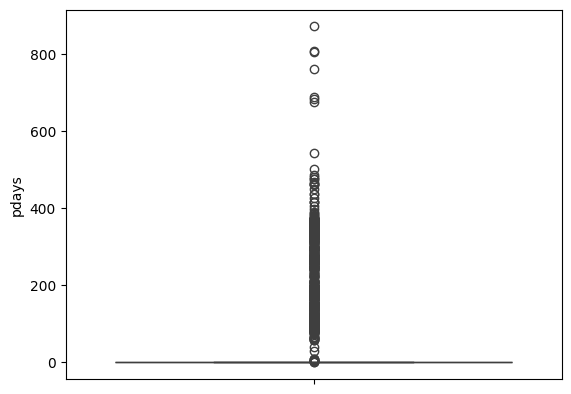

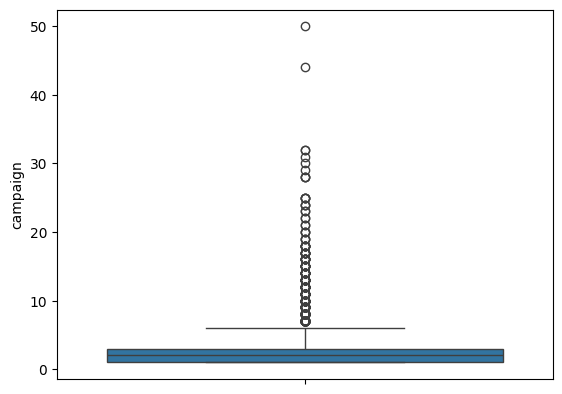

In [183]:
for column in [df.balance, df.day,df.duration,df.pdays,df.campaign]:
    sns.boxplot(data=column)
    plt.show()
    

                                                   Remove The Outliers

In [184]:
columns_to_check = ['balance','duration', 'pdays', 'campaign']

for column in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to remove outliers for the current column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

                                                      Feature Scalling

In [185]:
label_encoder = LabelEncoder()
df['y"'] = label_encoder.fit_transform(df['y"'])

# One-hot encoding of categorical features
df = pd.get_dummies(df, drop_first=True)\

X = df.drop('y"', axis=1)
y = df['y"']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [186]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

                                                           Train the Model

In [187]:
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

c:\Users\sanju\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 64)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8665 - loss: 0.4078 - val_accuracy: 0.9446 - val_loss: 0.2322
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9384 - loss: 0.2349 - val_accuracy: 0.9446 - val_loss: 0.2043
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.1930 - val_accuracy: 0.9446 - val_loss: 0.1852
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9323 - loss: 0.2008 - val_accuracy: 0.9446 - val_loss: 0.1731
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9427 - loss: 0.1514 - val_accuracy: 0.9424 - val_loss: 0.1672
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9292 - loss: 0.1707 - val_accuracy: 0.9446 - val_loss: 0.1650
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.1525 - val_accuracy: 0.9446 - val_loss: 0.1691
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9322 - loss: 0.1647 - val_accuracy: 0.9446 - val_loss:

                                             Check The Accurancy

In [189]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 94.68%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       539
           1       0.22      0.08      0.12        25

    accuracy                           0.95       564
   macro avg       0.59      0.53      0.55       564
weighted avg       0.93      0.95      0.93       564



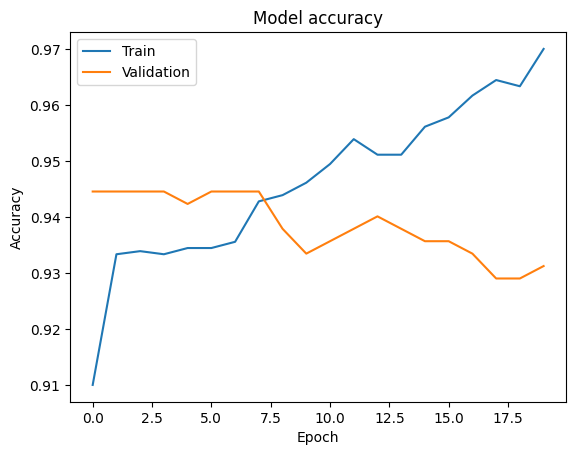

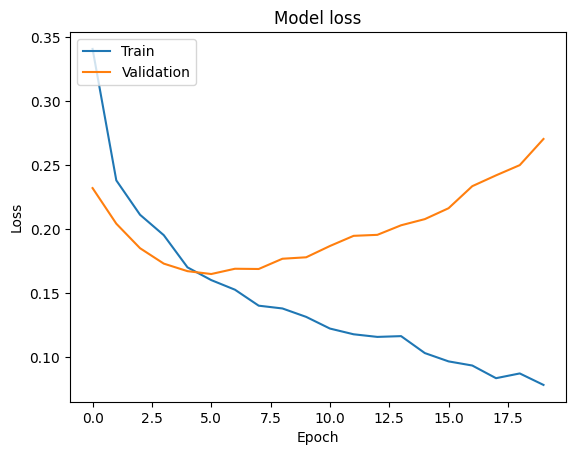

In [190]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

2. Based on given users data like his work area, qualification, marrital status,
predicted

In [191]:
Columns=['age','Workclass','Salary','education','education-num','marital-status','Occupation','relationship','colour','gender','capital-gain','capital-loss','hours-per-week','Country','income']

                                                            Load The Data

In [192]:
data=pd.read_csv("classification_2.csv",header=None,names=Columns)
data

,age,Workclass,Salary,education,education-num,marital-status,Occupation,relationship,colour,gender,capital-gain,capital-loss,hours-per-week,Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [193]:
data.isna().sum()

age               0
Workclass         0
Salary            0
education         0
education-num     0
marital-status    0
Occupation        0
relationship      0
colour            0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
Country           0
income            0
dtype: int64

In [194]:
data.replace('?',np.nan,inplace=None)

,age,Workclass,Salary,education,education-num,marital-status,Occupation,relationship,colour,gender,capital-gain,capital-loss,hours-per-week,Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


                                                        Check The Outliers

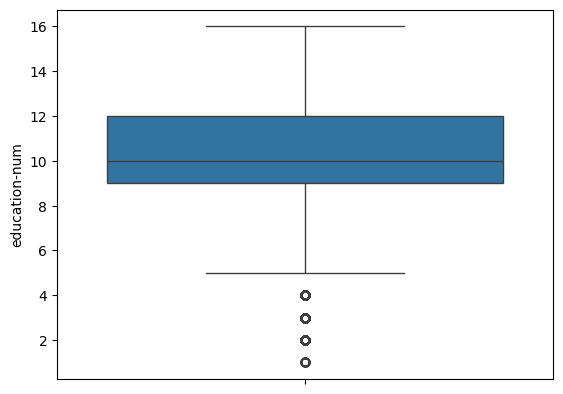

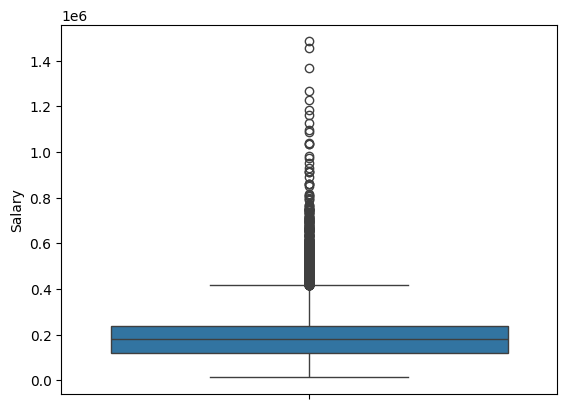

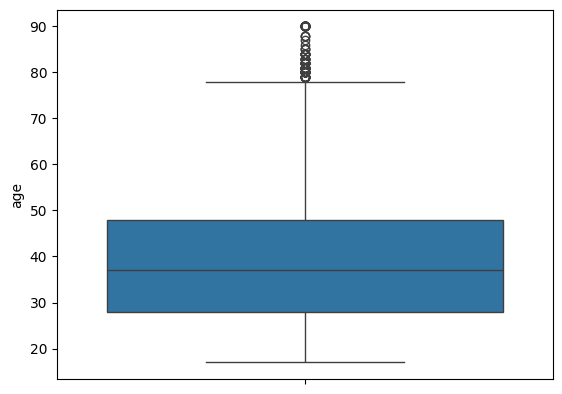

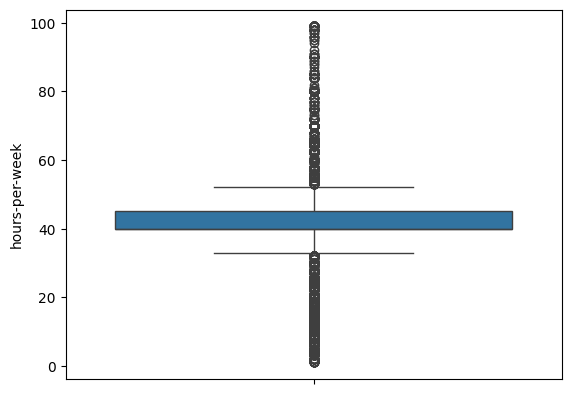

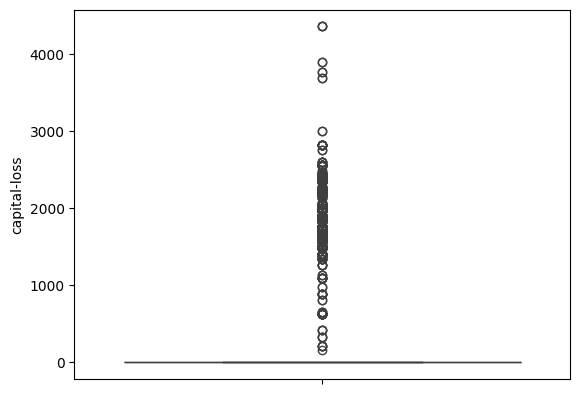

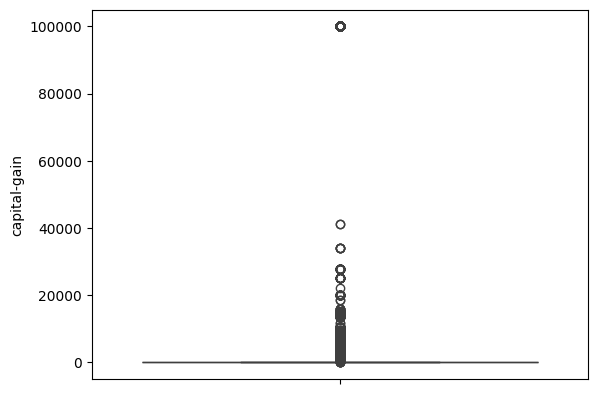

In [195]:
for column in [data['education-num'], data['Salary'],data['age'],data['hours-per-week'],data['capital-loss'],data['capital-gain']]:
    sns.boxplot(data=column)
    plt.show()

In [196]:
data

,age,Workclass,Salary,education,education-num,marital-status,Occupation,relationship,colour,gender,capital-gain,capital-loss,hours-per-week,Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


                                                      Remove the Outliers

In [197]:
columns_to_check = ['education-num','Salary','age','hours-per-week']

for column in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to remove outliers for the current column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

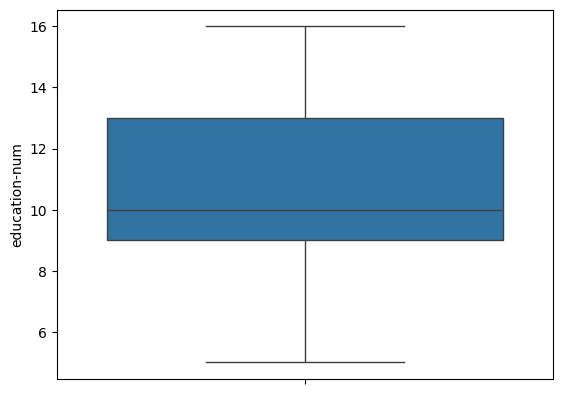

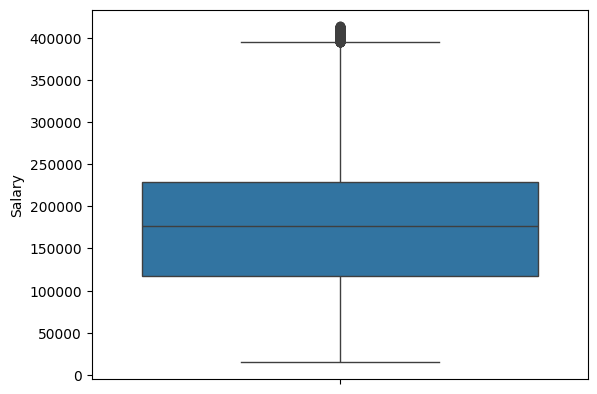

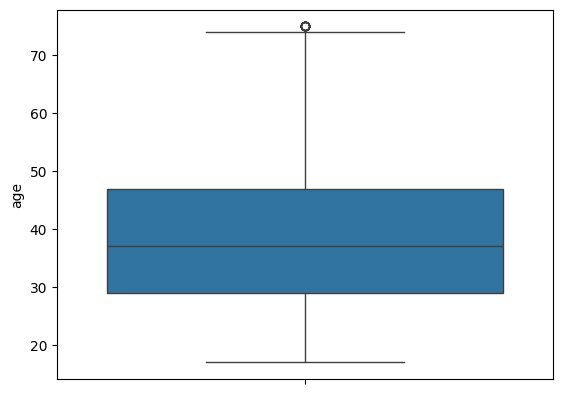

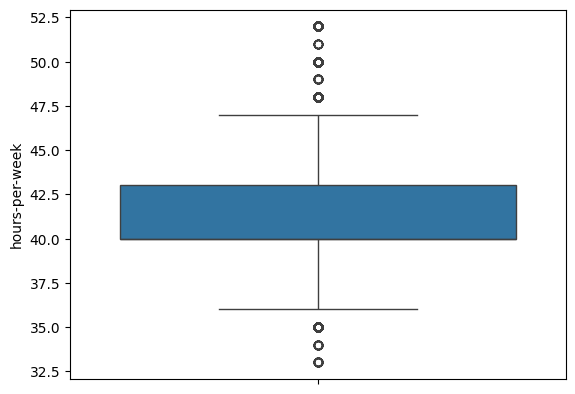

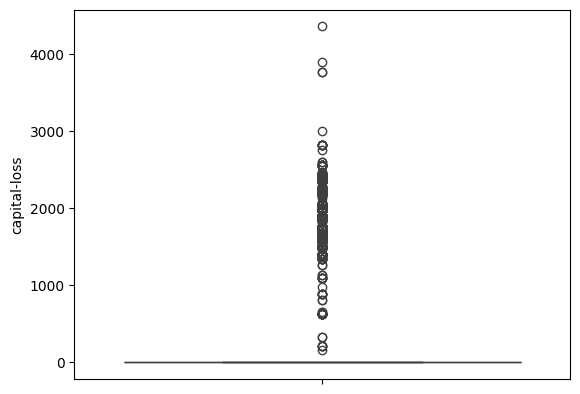

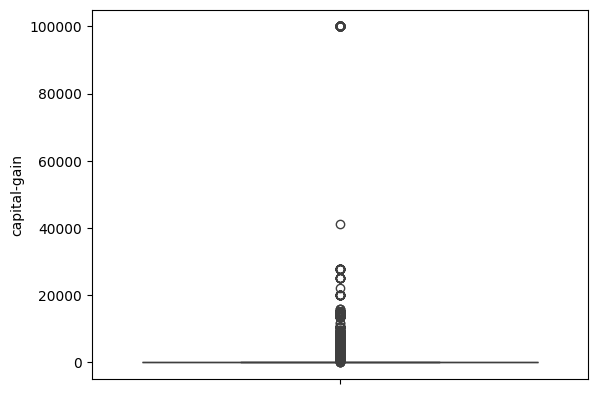

In [198]:
for column in [data['education-num'], data['Salary'],data['age'],data['hours-per-week'],data['capital-loss'],data['capital-gain']]:
    sns.boxplot(data=column)
    plt.show()

                                                       Futurer Scalling

In [199]:
label_enc = LabelEncoder()

# Apply encoding to categorical columns
data['Workclass'] = label_enc.fit_transform(data['Workclass'])
data['education'] = label_enc.fit_transform(data['education'])
data['marital-status'] = label_enc.fit_transform(data['marital-status'])
data['Occupation'] = label_enc.fit_transform(data['Occupation'])
data['relationship'] = label_enc.fit_transform(data['relationship'])
data['colour'] = label_enc.fit_transform(data['colour'])
data['gender'] = label_enc.fit_transform(data['gender'])
data['Country'] = label_enc.fit_transform(data['Country'])

# Target encoding for income
data['income'] = label_enc.fit_transform(data['income'])

# Define features (X) and target (y)
X = data.drop('income', axis=1)  # Features
y = data['income']  # Target (Income)

# Scale numerical features
scaler = StandardScaler()
X[['age', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X[['age', 'capital-gain', 'capital-loss', 'hours-per-week']])

                                                   Check The co-realation

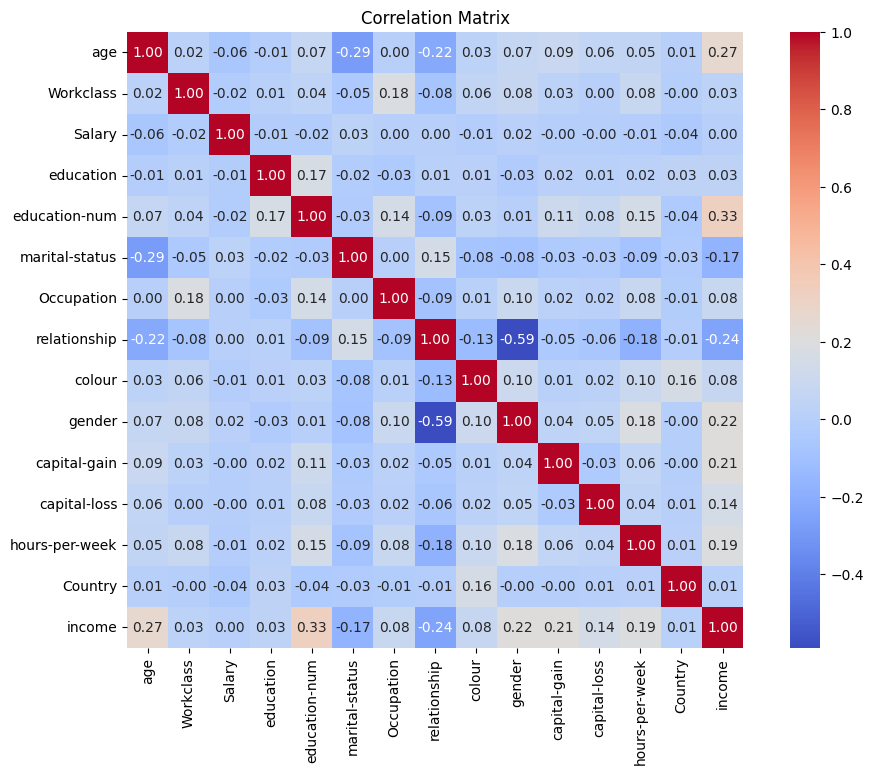

In [200]:
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

In [201]:
# Define features and target
X = data.drop('income', axis=1)
y = data['income']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")



Training Samples: 17533
Testing Samples: 4384


                                                           Train The Model

In [202]:
model = Sequential()

# Input layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(64, activation='relu'))

# More hidden layers
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\sanju\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6409 - loss: 341.6472 - val_accuracy: 0.7539 - val_loss: 0.6038
Epoch 2/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7476 - loss: 0.7262 - val_accuracy: 0.7724 - val_loss: 0.6046
Epoch 3/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7569 - loss: 0.6756 - val_accuracy: 0.7749 - val_loss: 0.5253
Epoch 4/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7531 - loss: 0.5663 - val_accuracy: 0.7641 - val_loss: 0.5400
Epoch 5/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7525 - loss: 0.6066 - val_accuracy: 0.7502 - val_loss: 0.5629
Epoch 6/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7400 - loss: 0.5802 - val_accuracy: 0.7518 - val_loss: 0.5578
Epoch 7/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7356 - loss: 1.3674 - val_accuracy: 0.7491 - val_loss: 0.5626
Epoch 8/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7391 - loss: 0.5775 - val_accuracy: 

                                            Evaluate the Model

In [204]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7345 - loss: 0.5787
Test Accuracy: 0.7365419864654541
